## Background
__mnist__ is of type base.Datasets. __Datasets__ are namedtuples (See https://docs.python.org/3.6/library/collections.html#collections.namedtuple). 

Datasets are __defined__ in /home/rm/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py. Datasets contain three objects of type __mnist.DataSet__.

The __class DataSet__ is defined in /home/rm/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py.

The class Dataset has the following __properties & methods__ that are used in the code below.
> the property: num_examples
> the method: next_batch()

For code that illustrates the above, see the set of print() statements in MNIST-mod1.ipynb

## Change to code
mnist.Datasets are no longer to be used. The training, validation, and test data will now be read in differently. So the functionality provided by mnist.Datasets have to be replicated.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys, os

In [2]:

pyfilepath = "/home/rm/Code-GettingStartedWithTF/Chapter 4"
dirname, basename = os.path.split(pyfilepath) # 

sys.path.append(dirname)
#See https://gist.github.com/DCAL12/1a872bd63bedfb7b12612c8a7ec0f52e#file-notebook_importing-py
from nbextensions import notebook_importing
from modGetMNIST_Data_Labels import fnGetCompleteListOfTraining_Data_Labels
from modGetMNIST_Data_Labels import fnGetCompleteListOfTest_Data_Labels
sys.path.pop()


importing Jupyter notebook from modGetMNIST_Data_Labels.ipynb


'/home/rm/Code-GettingStartedWithTF'

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1
######################
#RM
H_IN_PIXELS = 28
W_IN_PIXELS = 28
INPUT_SHAPE = [None, H_IN_PIXELS * W_IN_PIXELS] #Shape of Input data
OUTPUT_SHAPE = [None, 10] #Shape of Labels
BATCH_SIZE = 100
#######################
# See "Wrapping all together -> Switch between train and test set using Initializable iterator"
# in Tensorflow-Dataset-Tutorial/dataset_tutorial.ipynb
#
# create a placeholder to dynamically switch between batch sizes
batch_size = tf.placeholder(tf.int64)

x, y = tf.placeholder(tf.float32, shape=INPUT_SHAPE), \
                tf.placeholder(tf.int8, shape=OUTPUT_SHAPE)
dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size).repeat()

iter = dataset.make_initializable_iterator()
BatchOfFeatures_Labels = iter.get_next()

####################################################################



In [4]:
# Create model

# Set model weights
W = tf.Variable(tf.zeros([H_IN_PIXELS * W_IN_PIXELS, 10]), "Weights")
b = tf.Variable(tf.zeros([10]), "Bias")

Features = tf.placeholder(tf.float32, shape=INPUT_SHAPE)
TrueLabels = tf.placeholder(tf.float32, shape=OUTPUT_SHAPE)

# Construct model
WeightedInput = tf.matmul(Features, W)
estimated_label = WeightedInput + b # Softmax
activation = tf.nn.softmax(estimated_label) # Softmax

# Minimize error using cross entropy
cross_entropy = TrueLabels*tf.log(activation)
cost = tf.reduce_mean\
       (-tf.reduce_sum\
        (cross_entropy,reduction_indices=1))

optimizer = tf.train.\
            GradientDescentOptimizer(learning_rate).minimize(cost) 

# Test model
correct_prediction = tf.equal(tf.argmax(activation, 1), \
                              tf.argmax(TrueLabels, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Initializing the variables
init_vars = tf.global_variables_initializer()


In [5]:
#Plot settings
avg_set = []
epoch_set=[]

#Read the complete MNIST training data file
training_images, training_labels, no_of_training_images = fnGetCompleteListOfTraining_Data_Labels()

#print("training_images.shape, before flattening: ", training_images.shape)
assert(60000 == no_of_training_images)
assert(training_images.shape == (no_of_training_images, H_IN_PIXELS, W_IN_PIXELS, 1))
training_images = training_images.reshape(no_of_training_images, 28 * 28)
#print("training_images.shape after flattening: ", training_images.shape)
assert(training_images.shape == (no_of_training_images, H_IN_PIXELS * W_IN_PIXELS))
assert(training_labels.shape == (no_of_training_images, 10))

importing Jupyter notebook from /home/rm/cjalmeida/tf_mnist/data.ipynb
Path to Input Files:  /home/rm/cjalmeida/input

DONE: fnGetCompleteListOfMNIST_Data_Labels


In [6]:
#This block is just for probing
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # initialise iterator with train data
    #See https://www.tensorflow.org/api_docs/python/tf/data/Dataset#make_initializable_iterator
    # The initializer property returns the tf.operation that is run. It will initialize the iterator.
    # See https://www.tensorflow.org/api_docs/python/tf/data/Iterator#initializer
    sess.run(iter.initializer, feed_dict={ x: training_images, \
                                          y: training_labels, \
                                          batch_size: BATCH_SIZE})

    ListOfFeatures_Labels = sess.run(iter.get_next())
    assert( ListOfFeatures_Labels[0].shape == (BATCH_SIZE, H_IN_PIXELS*W_IN_PIXELS))
    assert( ListOfFeatures_Labels[1].shape == (BATCH_SIZE, 10))



Epoch: 0000 cost= 0.654684401
Epoch: 0004 cost= 0.328936955
Epoch: 0008 cost= 0.303671660
Epoch: 0012 cost= 0.291830162
Epoch: 0016 cost= 0.284551140
Epoch: 0020 cost= 0.279458916
Epoch: 0024 cost= 0.275611972


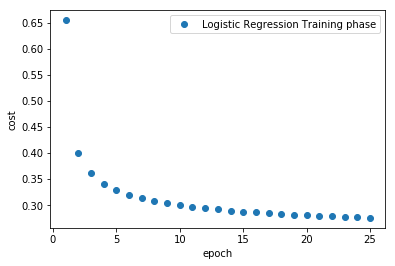


DONE: Training phase
Model accuracy (with Training Data): 0.9183667
Path to Input Files:  /home/rm/cjalmeida/input

DONE: fnGetCompleteListOfTest_Data_Labels
Model accuracy (with Test Data): 0.9019


In [7]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init_vars)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_no_of_batches = no_of_training_images//BATCH_SIZE
######################################
        # initialise iterator with train data
        sess.run(iter.initializer, feed_dict={ x: training_images,\
                                              y: training_labels, \
                                              batch_size: BATCH_SIZE})
######################################
        # Loop over all batches
        for batch_no in range(total_no_of_batches):
            #if(0 == batch_no):
            #    print("Epoch No: {}, Batch No:{}".format(epoch, batch_no))
            ListOfFeatures_Labels = sess.run(BatchOfFeatures_Labels)
            batch_Features = ListOfFeatures_Labels[0]
            batch_Labels = ListOfFeatures_Labels[1]

            assert(batch_Features.shape == (BATCH_SIZE, H_IN_PIXELS * W_IN_PIXELS))

            # Fit training using batch data
            sess.run(optimizer, \
                     feed_dict={Features: batch_Features, \
                               TrueLabels: batch_Labels})
            # Compute average loss
            avg_cost += (sess.run(cost, \
                                 feed_dict={Features: batch_Features, \
                                           TrueLabels: batch_Labels}) \
                                )/total_no_of_batches
        # Display logs per epoch step
        if epoch % (4) == 0:
            print ("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
        
    #Plot it
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    print ("\nDONE: Training phase")

    print ("Model accuracy (with Training Data):", accuracy.eval({Features: training_images, \
                                          TrueLabels: training_labels}))

    #Check accuracy using test data
    test_images, test_labels, no_of_test_images = fnGetCompleteListOfTest_Data_Labels()

    assert(10000 == no_of_test_images)
    assert(test_images.shape == (no_of_test_images, H_IN_PIXELS, W_IN_PIXELS, 1))

    test_images = test_images.reshape(no_of_test_images, 28 * 28)

    assert(test_images.shape == (no_of_test_images, H_IN_PIXELS * W_IN_PIXELS))
    assert(test_labels.shape == (no_of_test_images, 10))

    print ("Model accuracy (with Test Data):", accuracy.eval({Features: test_images, \
                                          TrueLabels: test_labels}))
